# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

# **Course 3 End-of-course project: Exploratory data analysis**



**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>

# **Visualize a story in Python**

<img src="/Users/kamaladadashova/Desktop/Google Analytics/C3- EDA/Pace.png" width="100" height="100" align=left>

# **PACE stages (Plan, Analyze, Construct, and Execute)**


<img src="/Users/kamaladadashova/Desktop/Google Analytics/C3- EDA/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**


### **Task 1. Imports and data loading**





In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

<img src="/Users/kamaladadashova/Desktop/Google Analytics/C3- EDA/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

1. Does the data need to be restructured or converted into usable formats? It is already in a structured format, and each row represents a user. 

2. Are there any variables that have missing data? Yes, 700 rows have `label` missing, while other variables do not have missing value.


### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

**Answers:**

1. The `label` column is important since we are interested in user churn. One should also take other variables who tie to user behaviours into consideration. Based on the columns in dataset, all variables tie to user behavior except `ID`.

2. We can drop `ID` from the analysis because we are not interested in identifying a specific user. So, including `ID` into the analysis will not provide insightful information about the churn (unless `ID` is assigned based on user sign-up time).

#### **Data overview and summary statistics**

In [15]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [16]:
df.shape

(14999, 13)

In [17]:
df.size

194987

In [18]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="/Users/kamaladadashova/Desktop/Google Analytics/C3- EDA/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the following questions as you prepare to address outliers:

1. **How can you identify outliers?**
   * Utilize NumPy functions to examine the `mean()` and `median()` of the data to understand the range of values.
   * Create a boxplot to visually assess the distribution of the data.

2. **How do you decide whether to keep or exclude outliers in future models?**

   * There are three primary approaches to managing outliers: retaining them as they are, removing them, or adjusting their values. The choice depends on the specific dataset and your objectives for the model you intend to build. Here are some general guidelines to help you decide:

     * **Remove them**: If you are certain that the outliers are errors, such as mistakes or typos, and the dataset is intended for modeling or machine learning, removing outliers might be the best option, although this approach is used less frequently.
     * **Adjust them**: For smaller datasets, or when preparing data for modeling or machine learning, you might choose to replace outlier values with derived new values.
     * **Retain them**: If the dataset is primarily for exploratory data analysis (EDA) or if the model you are preparing is robust against outliers, it may be best to leave the outliers as they are.

### **Task 3a. Visualizations**

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

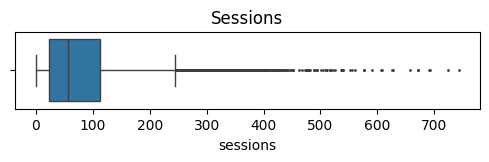

In [20]:
# Box plot
plt.figure(figsize=(6,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('Sessions');

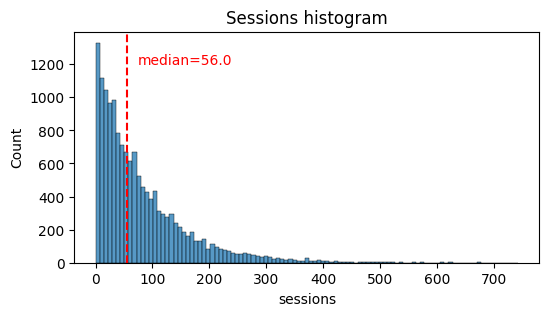

In [22]:
# Histogram
plt.figure(figsize=(6,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('Sessions histogram');

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

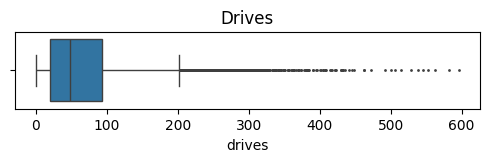

In [23]:
# Box plot
plt.figure(figsize=(6,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('Drives');

In [24]:
def histogram_maker(column_str, median_text=True, **kwargs):   
                                                            
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

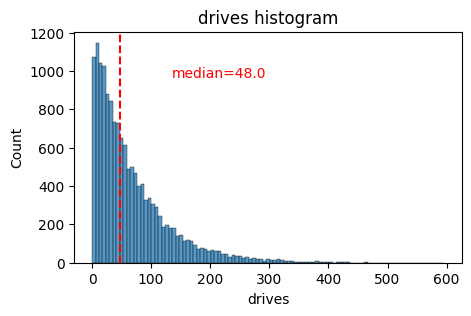

In [25]:
# Histogram
histogram_maker('drives')


The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

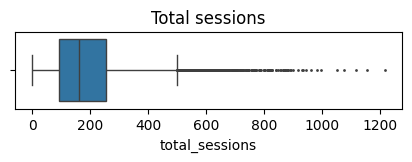

In [26]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('Total sessions');

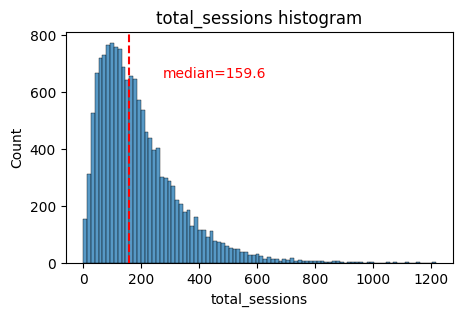

In [27]:
# Histogram
histogram_maker('total_sessions')

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 56 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something  can be  examined more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

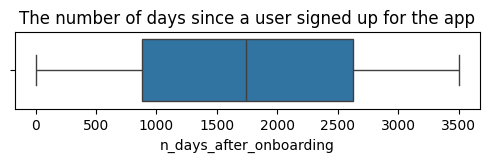

In [28]:
# Box plot
plt.figure(figsize=(6,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('The number of days since a user signed up for the app');

Median: 1741.0


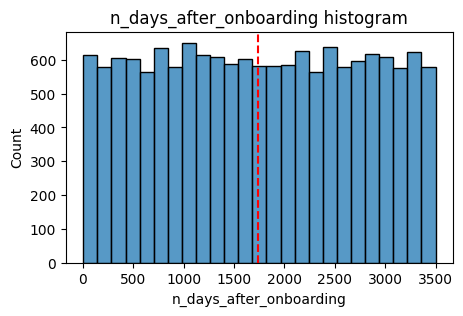

In [29]:
# Histogram
histogram_maker('n_days_after_onboarding', median_text=False)

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

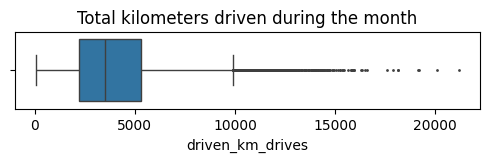

In [30]:
# Box plot
plt.figure(figsize=(6,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('Total kilometers driven during the month');

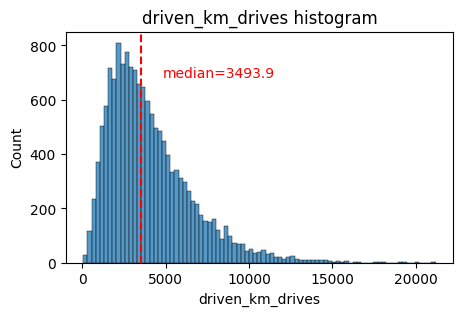

In [31]:
# Histogram
histogram_maker('driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

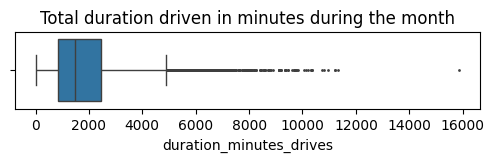

In [32]:
# Box plot
plt.figure(figsize=(6,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('Total duration driven in minutes during the month');

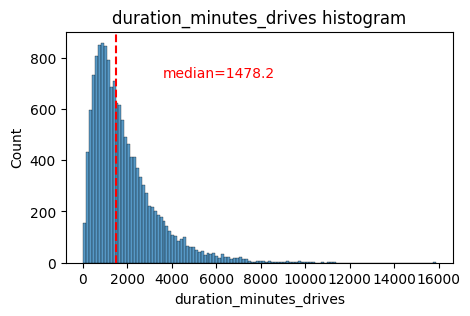

In [33]:
# Histogram
histogram_maker('duration_minutes_drives')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

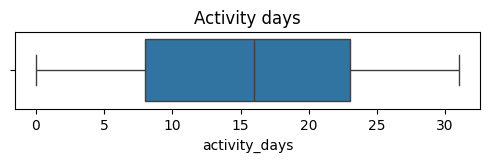

In [34]:
# Box plot
plt.figure(figsize=(6,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('Activity days');

Median: 16.0


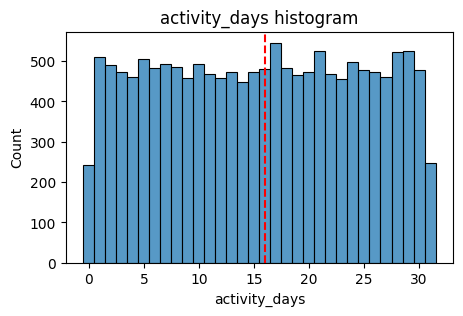

In [35]:
# Histogram
histogram_maker('activity_days', median_text=False, discrete=True)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which might need further investigation, would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

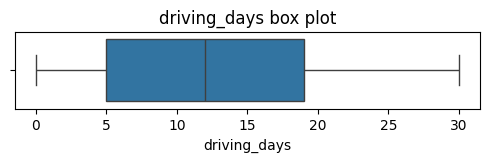

In [36]:
# Box plot
plt.figure(figsize=(6,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot');

Median: 12.0


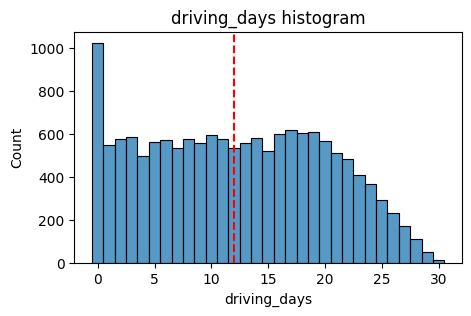

In [37]:
# Histogram
histogram_maker('driving_days', median_text=False, discrete=True)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right. However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

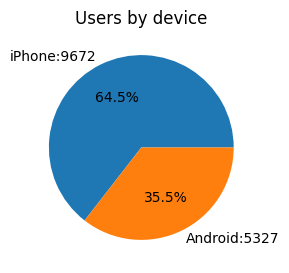

In [38]:
# Pie chart
fig,ax = plt.subplots(figsize=(3,3))
data=df['device'].value_counts()
ax.pie(data[:2],
      labels=[f'{label}:{count}' for label, count in zip(data.index[:2],data.values[:2])],
      autopct='%0.1f%%')

ax.set_title('Users by device')
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

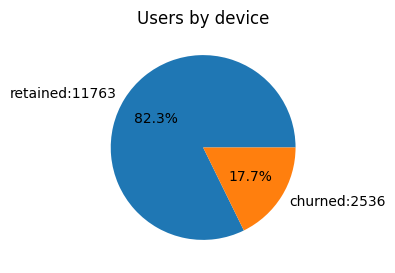

In [40]:
# Pie chart
fig,ax = plt.subplots(figsize=(3,3))
data=df['label'].value_counts()
ax.pie(data[:2],
      labels=[f'{label}:{count}' for label, count in zip(data.index[:2],data.values[:2])],
      autopct='%0.1f%%')

ax.set_title('Users by device')
plt.show()

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, let's plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

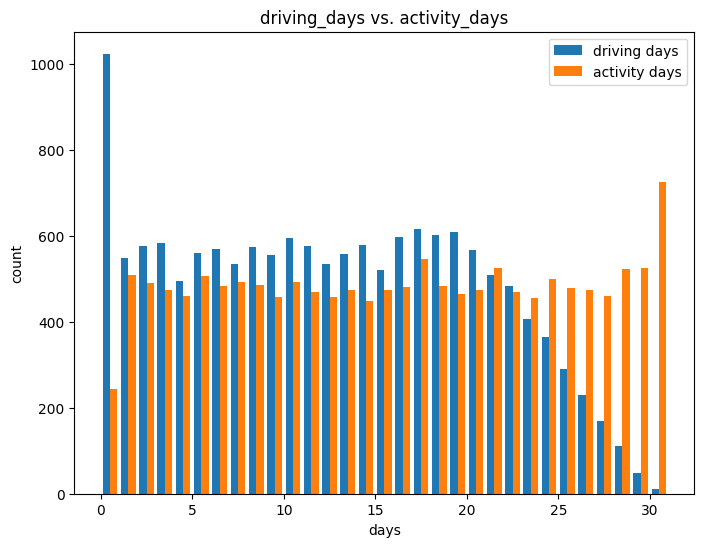

In [41]:
# Histogram
plt.figure(figsize=(8,6))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,32),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [42]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

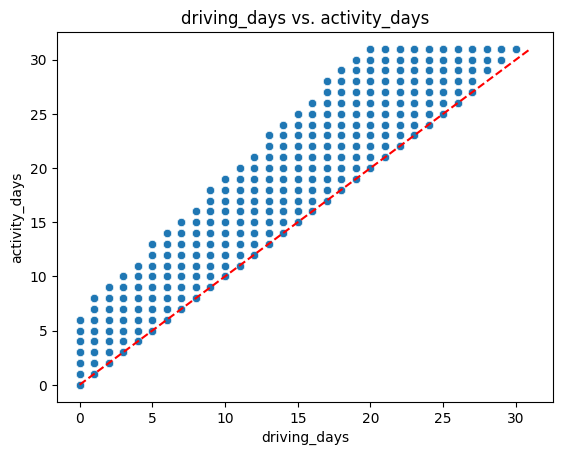

In [43]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

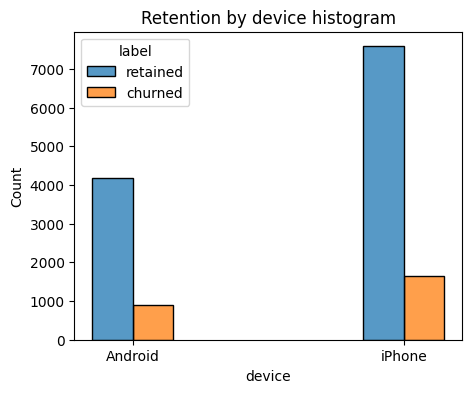

In [44]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.3
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

I discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Let's examine this further.

Let's create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.


In [45]:

df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

/Users/kamaladadashova/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined. Let us convert these values from infinity to zero and call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [46]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, we disregard rows where the distance in this column is greater than 1,200 km. Let us plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. 

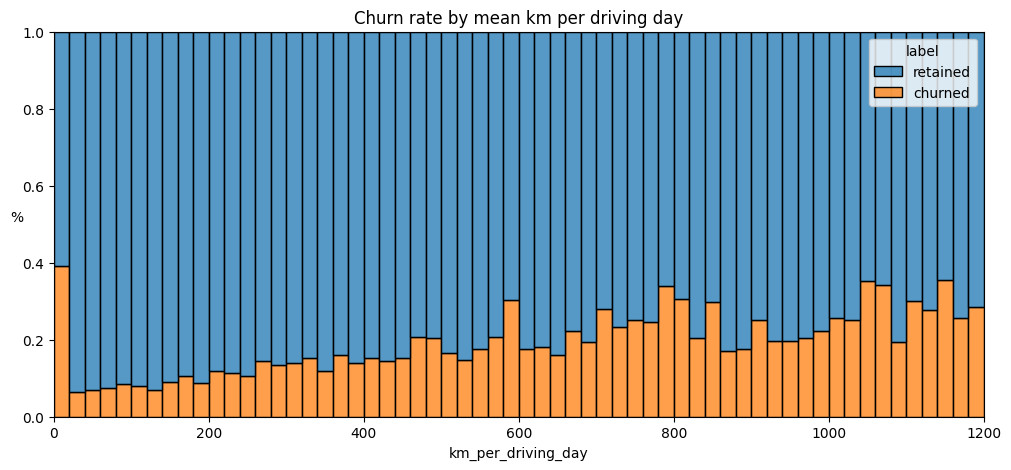

In [47]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found previously It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

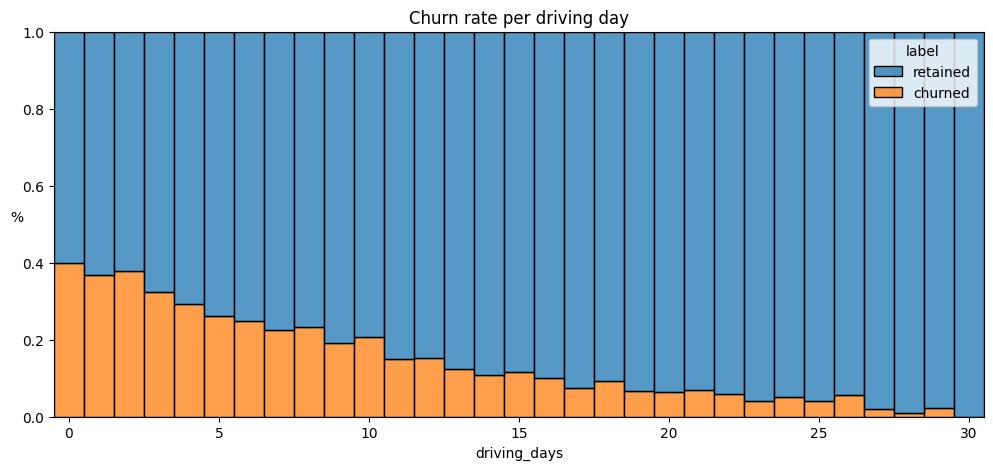

In [48]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

In [52]:
#the percentage of each user's total sessions that were logged in their last month of use.
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

What is the median value of the new column?

In [53]:
print(df['percent_sessions_in_last_month'].median())

0.42309702992763176


Median: 0.4


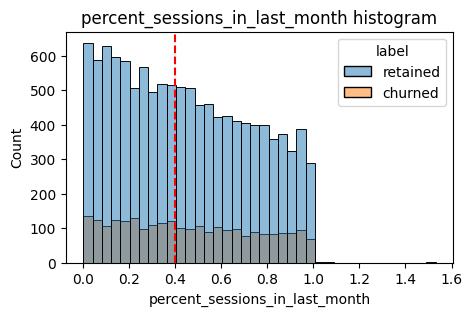

In [54]:
# Histogram
histogram_maker('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

In [56]:
print(df['n_days_after_onboarding'].median())

1741.0


Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

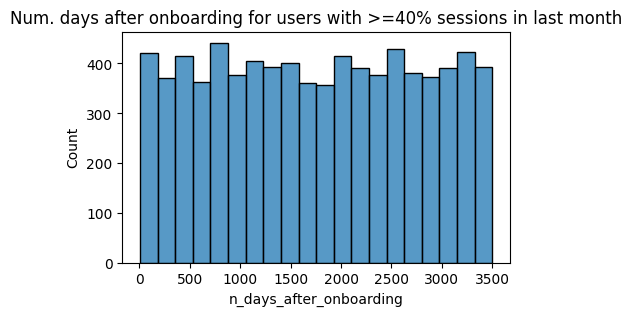

In [57]:
# histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

In [58]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [59]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [60]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users. It is worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

<img src="/Users/kamaladadashova/Desktop/Google Analytics/C3- EDA/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**



### **Task 4a. Results and evaluation**

I have learned ....

* There is missing data in the user churn label, so we might need  further data processing before further analysis.
* There are many outlying observations for drives, so we might consider a variable transformation to stabilize the variation.
* The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
* On average, retained users have fewer drives than churned users.

My other questions are ....

* How does the missingness in the user churn label arise?
* Who are the users with an extremely large number of drives? Are they ridesharing drivers or commercial drivers?
* Why do retained users have fewer drives than churned users? Is it because churned users have a longer history of using the Waze app?
* What is the user demographic for retained users and churned users?

My client would likely want to know ...

* What are the key variables associated with user churn?
* Can we implement policies to reduce user churn?




### **Task 4b. Conclusion**

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

> *Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.*

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

> *Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`. Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.*

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

> *Yes. I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?*

4. What percentage of users churned and what percentage were retained?

> *Less than 18% of users churned, and \~82% were retained.*

5. What factors correlated with user churn? How?

> *Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.*

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?

> *No. Users of all tenures from brand new to \~10 years were relatively evenly represented in the data. This is borne out by the histogram for `n_days_after_onboarding`, which reveals a uniform distribution for this variable.*